In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from pathlib import Path
import os

In [70]:
DATASET_PATH=r"artifacts\data_ingestion\Churn_Modelling.csv"
new=r"artifacts\data_ingestion"
DATASET_PATH=Path(DATASET_PATH)

In [71]:
df=pd.read_csv(DATASET_PATH)

In [72]:
df.shape

(10000, 14)

In [73]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [75]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [76]:
df=df[["CreditScore","Gender","Age","Tenure","Balance","HasCrCard","Exited"]]

In [77]:
df.to_csv(os.path.join(new,"Selected_columns.csv"),index=False)

In [78]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,Exited
0,619,Female,42,2,0.00,1,1
1,608,Female,41,1,83807.86,0,0
2,502,Female,42,8,159660.80,1,1
3,699,Female,39,1,0.00,0,0
4,850,Female,43,2,125510.82,1,0


<Axes: xlabel='CreditScore', ylabel='Count'>

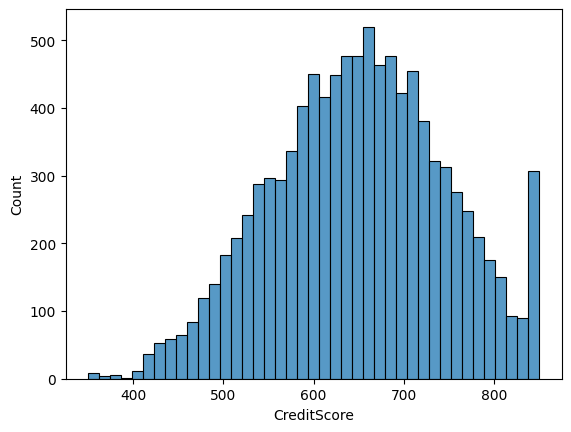

In [79]:
sn.histplot(df.CreditScore)

In [80]:
minimum=df.CreditScore.quantile(0.01)
maximum=df.CreditScore.quantile(0.99)
df1=df[(df.CreditScore < maximum) & (df.CreditScore > minimum)]

<Axes: xlabel='CreditScore', ylabel='Count'>

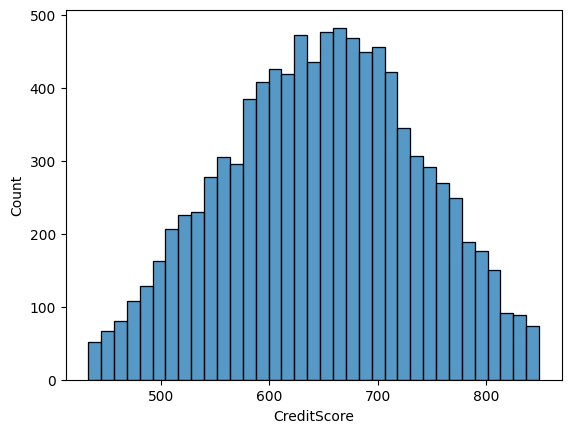

In [83]:
sn.histplot(df1.CreditScore)

In [84]:
df1.shape

(9663, 7)

In [85]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'Exited'],
      dtype='object')

In [86]:
male=int(df1.Gender.value_counts()[0])
female=int(df1.Gender.value_counts()[1])

C:\Users\HPENG\AppData\Local\Temp\ipykernel_38624\3131796683.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male=int(df1.Gender.value_counts()[0])
C:\Users\HPENG\AppData\Local\Temp\ipykernel_38624\3131796683.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female=int(df1.Gender.value_counts()[1])


Text(0.5, 1.0, 'Distribution of Male and Female Employees')

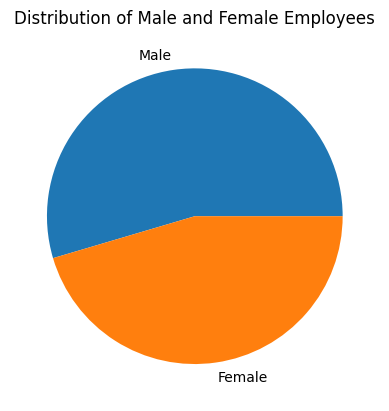

In [87]:
plt.pie([male,female],labels=["Male","Female"])
plt.title("Distribution of Male and Female Employees")

In [88]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'Exited'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

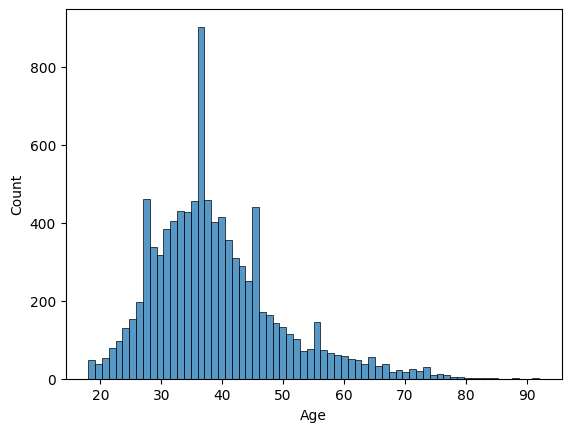

In [89]:
sn.histplot(df1.Age)

<Axes: xlabel='Age', ylabel='Count'>

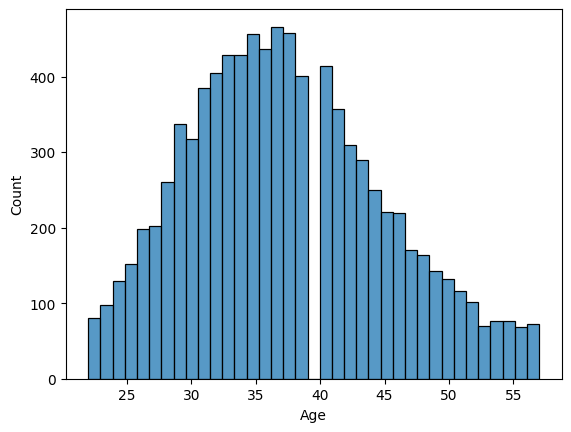

In [92]:
minimum=df1.Age.quantile(0.01)
maximum=df1.Age.quantile(0.94)
df2=df1[(df1.Age < maximum) & (df1.Age > minimum)]
sn.histplot(df2.Age)

In [93]:
df2.shape

(8891, 7)

In [94]:
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'Exited'],
      dtype='object')

<Axes: xlabel='Tenure', ylabel='Count'>

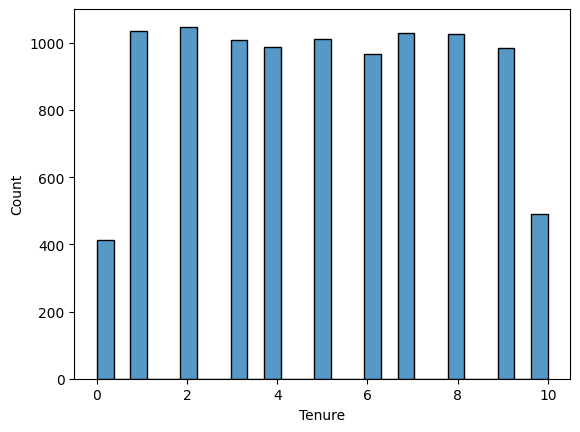

In [95]:
sn.histplot(df.Tenure)

In [99]:
df3=df2[df2.Tenure != 0]

In [100]:
df3.shape

(8532, 7)

In [101]:
df3.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'Exited'],
      dtype='object')

In [102]:
df.HasCrCard.value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

<Axes: xlabel='Balance', ylabel='Count'>

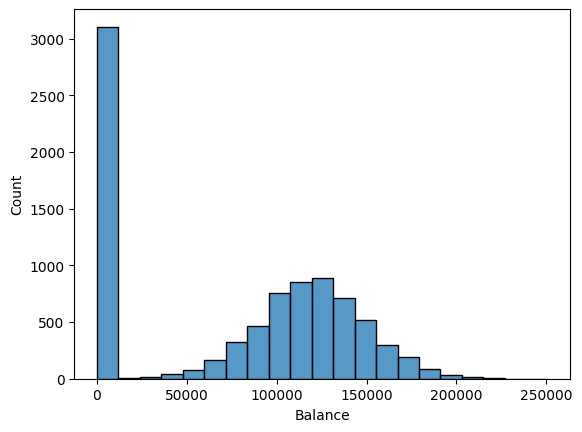

In [103]:
sn.histplot(df3.Balance)

<Axes: xlabel='Balance', ylabel='Count'>

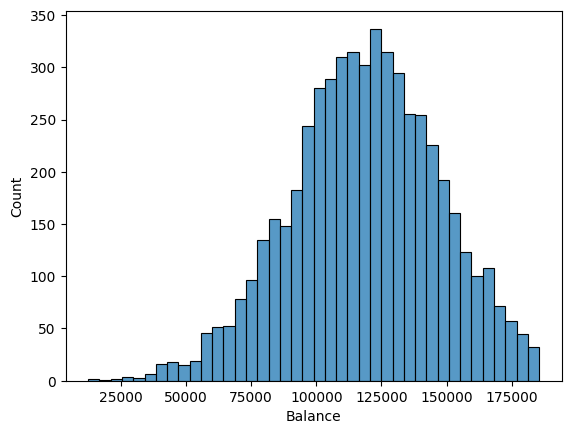

In [114]:
minimum=df3.Balance.quantile(0.2)
maximum=df3.Balance.quantile(0.99)
df4=df3[(df3.Balance < maximum) & (df3.Balance > minimum)]
sn.histplot(df4.Balance)

In [115]:
df4.shape

(5342, 7)

In [116]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'Exited'],
      dtype='object')

In [119]:
df4.Exited.value_counts()

Exited
0    4120
1    1222
Name: count, dtype: int64

In [122]:
Present=df4[df4.Exited == 0]
Exit =df4[df4.Exited == 1]

In [125]:
Present.shape[0]

4120

In [128]:
Exit=Exit.sample(4120,replace=True)

In [129]:
Present.shape,Exit.shape

((4120, 7), (4120, 7))

In [130]:
df5=pd.concat([Present,Exit])

In [131]:
df5.Exited.value_counts()

Exited
0    4120
1    4120
Name: count, dtype: int64

In [132]:
df5.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,Exited
1,608,Female,41,1,83807.86,0,0
8,501,Male,44,4,142051.07,0,0
9,684,Male,27,2,134603.88,1,0
10,528,Male,31,6,102016.72,0,0
15,616,Male,45,3,143129.41,0,0


In [135]:
df5['Gender'] = df5['Gender'].apply(lambda x : 0 if x == "Female" else 1)

In [136]:
df5.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,Exited
1,608,0,41,1,83807.86,0,0
8,501,1,44,4,142051.07,0,0
9,684,1,27,2,134603.88,1,0
10,528,1,31,6,102016.72,0,0
15,616,1,45,3,143129.41,0,0


In [145]:
df5.to_csv(r"artifacts/data_ingestion/preprocess.csv",index=False)

In [146]:
X=df5.drop(columns = ['Exited'])
Y=df5[['Exited']]

In [147]:
X

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard
1,608,0,41,1,83807.86,0
8,501,1,44,4,142051.07,0
9,684,1,27,2,134603.88,1
10,528,1,31,6,102016.72,0
15,616,1,45,3,143129.41,0
...,...,...,...,...,...,...
1862,481,1,44,9,175303.06,1
3626,789,0,37,6,110689.07,1
1447,697,1,56,5,110802.03,1
2351,651,1,35,7,74623.50,1


In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=45)

In [150]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6592, 6), (1648, 6), (6592, 1), (1648, 1))

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [177]:
model=RandomForestClassifier(random_state=50,n_estimators=100)
model.fit(X_train,y_train)

D:\machinelearningprojects\customerchurnprediction\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=50)

In [178]:
model.score(X_test,y_test)

0.9004854368932039

In [179]:
from sklearn.metrics import classification_report,confusion_matrix

In [180]:
predictions=model.predict(X_test)

In [182]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       843
           1       0.86      0.95      0.90       805

    accuracy                           0.90      1648
   macro avg       0.90      0.90      0.90      1648
weighted avg       0.90      0.90      0.90      1648



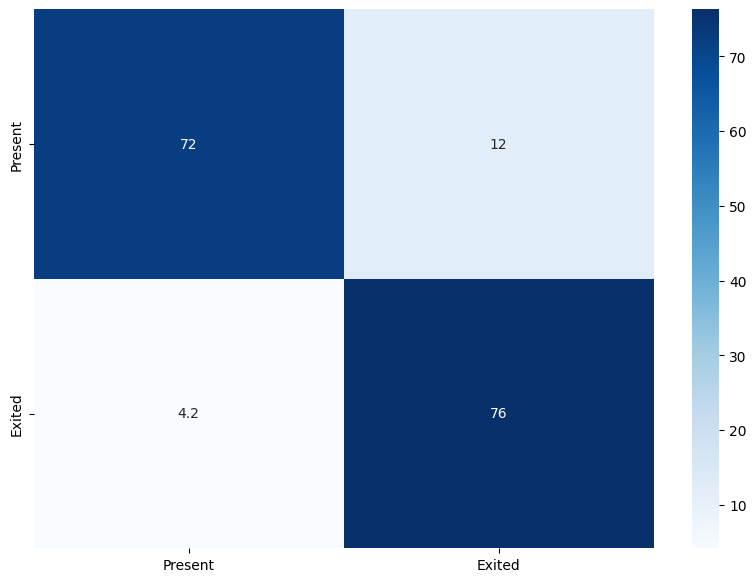

In [187]:
cm=confusion_matrix(y_test,predictions)/10
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,cmap='Blues',xticklabels=["Present","Exited"],yticklabels=["Present","Exited"])
plt.show()


In [188]:
import joblib

In [191]:
joblib.dump(model,r"artifacts/data_ingestion/model.pkl")

['artifacts/data_ingestion/model.pkl']